In [1]:
# import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

import matplotlib as mpl 

# These are some parameters to make figures nice (and big)
xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 12, 6
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

In [2]:
# Load data: I've gathered 20 variables for the lower 48 states: ERA5_gater_regional_data.ipynb
# daily JJA data 1979-2021

path='/data/keeling/a/cristi/a/data_processed/ERA5_JJA_daily/'
fname=path+'ERA5_JJA_daily_1979-2021_US48_20vars.nc'
ds=xr.open_dataset(fname).load()
ds

<xarray.Dataset>
Dimensions:    (latitude: 105, longitude: 237, time: 3956)
Coordinates:
  * time       (time) datetime64[ns] 1979-06-01 1979-06-02 ... 2021-08-31
  * longitude  (longitude) float32 235.0 235.2 235.5 235.8 ... 293.5 293.8 294.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... 24.5 24.25 24.0
Data variables:
    t2m        (time, latitude, longitude) float32 291.2 290.9 ... 300.5 300.6
    t2max      (time, latitude, longitude) float32 297.1 298.9 ... 301.3 301.3
    d2m        (time, latitude, longitude) float32 283.5 283.1 ... 295.9 295.9
    swvl1      (time, latitude, longitude) float32 0.1086 0.2378 ... 0.1869
    swvl2      (time, latitude, longitude) float32 0.1314 0.2887 ... -1.304e-07
    swvl3      (time, latitude, longitude) float32 0.1285 0.2952 ... 2.58e-06
    swvl4      (time, latitude, longitude) float32 0.1618 0.3859 ... 0.0 0.0
    ssr        (time, latitude, longitude) float32 1.082e+06 ... 8.259e+05
    str        (time, latitude, longitude) float32 -2.765e+05 ... -2.135e+05
    sshf       (time, latitude, longitude) float32 -7.727e+04 ... -1.693e+04
    slhf       (time, latitude, longitude) float32 -2.062e+05 ... -2.567e+05
    e          (time, latitude, longitude) float32 -8.244e-05 ... -0.0001027
    ro         (time, latitude, longitude) float32 1.687e-05 3.696e-05 ... 0.0
    tp         (time, latitude, longitude) float32 0.0 0.0 ... 1.762e-05
    skt        (time, latitude, longitude) float32 289.5 291.4 ... 302.0 301.9
    stl1       (time, latitude, longitude) float32 287.7 289.2 ... 302.2 302.1
    z500       (time, latitude, longitude) float32 5.677e+04 ... 5.762e+04
    t850       (time, latitude, longitude) float32 285.1 285.1 ... 290.3 290.3
    t500       (time, latitude, longitude) float32 259.7 259.6 ... 268.2 268.2
    t700       (time, latitude, longitude) float32 275.6 275.5 ... 282.9 282.9

In [3]:
# lat-lon values for a few locations

D=[{'location':'DOE SGP ARM','lat':36.6,'lon':360-97.5},
   {'location':'Wichita KS','lat':37.68,'lon':360-97.33},
   {'location':'Washington DC','lat':38.9,'lon':360-77.0},
   {'location':'Atlanta','lat':33.74,'lon':360-84.4},
   {'location':'Dallas, TX','lat':32.77,'lon':360-96.8},
   {'location':'Denver, CO','lat':39.7,'lon':360-104.99},
   {'location':'Chicago, IL','lat':41.9,'lon':360-87.6},
   {'location':'Minneapolis ','lat':39.7,'lon':360-104.99},
   {'location':'Seattle, WA','lat':47.6,'lon':360-122.3},
   {'location':'Las Vegas, NV','lat':36.17,'lon':360-115.13},
   {'location':'Los Angeles, CA','lat':34.05,'lon':360-118.24},
   {'location':'New York, NY','lat':40.71,'lon':360-74.00}]

In [8]:
# Choose location and extract data
ind=8

lat=D[ind]['lat']
lon=D[ind]['lon']
location=D[ind]['location']
print(location)

#extract data for one location
ds_loc=ds.sel(latitude=lat,longitude=lon,method='nearest')

Seattle, WA


In [9]:
#Extract a few variables 
# This is if we want ot try teh analaysis with skin temp instead of t2m
temp=ds_loc.t2m
soil=ds_loc.swvl1
dew = ds_loc.d2m

#t700=ds_loc.t700
#t850=ds_loc.t850
solar=ds_loc.ssr/3600

solar_mean = np.mean(solar)
solar_std = np.std(solar)
Td_mean = np.mean(dew)
Td_std = np.std(dew)
soil_max = np.max(soil)
soil_min = np.min(soil)

solar_mean, solar_std, Td_mean, Td_std, soil_max, soil_min

(<xarray.DataArray 'ssr' ()>
 array(216.16136, dtype=float32)
 Coordinates:
     longitude  float32 237.8
     latitude   float32 47.5,
 <xarray.DataArray 'ssr' ()>
 array(66.79452, dtype=float32)
 Coordinates:
     longitude  float32 237.8
     latitude   float32 47.5,
 <xarray.DataArray 'd2m' ()>
 array(285.30115, dtype=float32)
 Coordinates:
     longitude  float32 237.8
     latitude   float32 47.5,
 <xarray.DataArray 'd2m' ()>
 array(2.127125, dtype=float32)
 Coordinates:
     longitude  float32 237.8
     latitude   float32 47.5,
 <xarray.DataArray 'swvl1' ()>
 array(0.4239211, dtype=float32)
 Coordinates:
     longitude  float32 237.8
     latitude   float32 47.5,
 <xarray.DataArray 'swvl1' ()>
 array(0.12589258, dtype=float32)
 Coordinates:
     longitude  float32 237.8
     latitude   float32 47.5)

In [7]:
# Compute percentiles 

# Temperature percentiles
t99= np.percentile(temp,99)
t95= np.percentile(temp,95)

# Compute 10 soil moisture quantiles
ql=np.percentile(soil,np.arange(0,100,10))
qu=np.percentile(soil,np.arange(5,105,10))

# compute the soil moisture mean, temperature mean and temperature standard deviation in each quantile
temp_mean=np.zeros(len(ql))
temp_sd  =np.zeros(len(ql))
soil_mean=np.zeros(len(ql))

for j in range(len(ql)):
    temp_mean[j]=temp.where(soil>ql[j]).where(soil<qu[j]).mean()
    temp_sd  [j]=temp.where(soil>ql[j]).where(soil<qu[j]).std()
    soil_mean[j]=soil.where(soil>ql[j]).where(soil<qu[j]).mean()

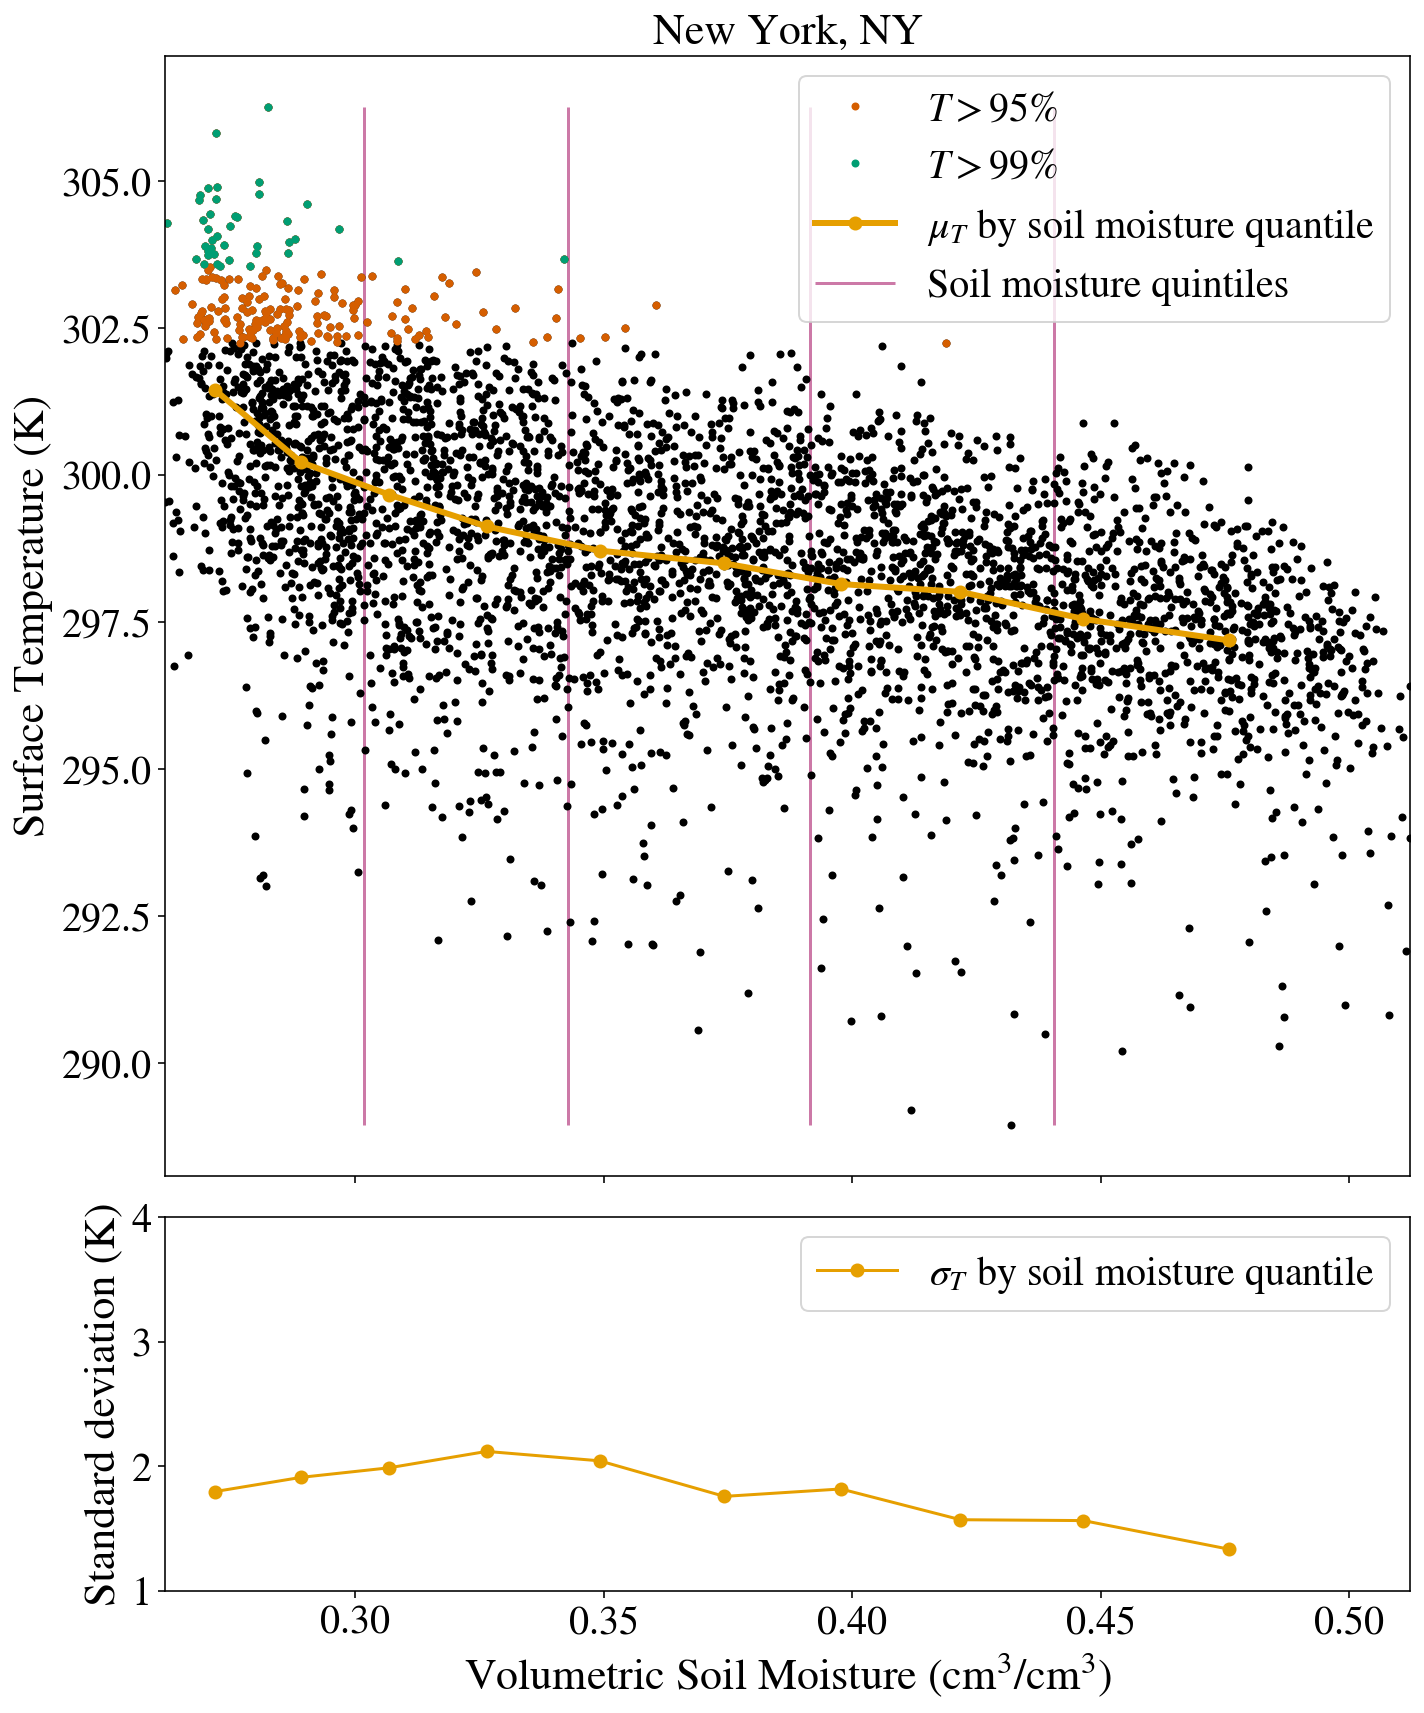

In [8]:
# Plot temperature-soil moisture relation without SMACM input

fig,ax = plt.subplots(2, 1, figsize=[10,12],gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# plot soil-moisture and temperature
ax[0].set_title('New York, NY', fontsize=22)
ax[0].plot(soil          ,temp          ,'.', color='k')
ax[0].plot(soil[temp>t95],temp[temp>t95],'.', color='#D55E00',label='$T > 95$%')
ax[0].plot(soil[temp>t99],temp[temp>t99],'.', color='#009E73',label='$T > 99$%')
ax[0].plot(soil_mean,temp_mean,label='$\mu_T$ by soil moisture quantile', color='#E69F00', linewidth=3, marker='o', linestyle='solid')
# plot soil moisture quintiles
soil_qs= np.percentile(soil,[20,40,60,80])
ax[0].vlines(soil_qs,np.min(temp),np.max(temp),label='Soil moisture quintiles',color='#CC79A7')

# decorate
#ax[0].set_xlabel('volumetric soil moisture')
ax[0].set_ylabel('Surface Temperature (K)', fontsize=22)
#ax[0].set_xlim(np.min(soil),np.max(soil))

# plot temperature standard deviation
ax[1].plot(soil_mean,temp_sd,color='#E69F00', marker='o', label= '$\sigma_T$ by soil moisture quantile')
ax[1].set_xlim(np.min(soil),np.max(soil))
ax[1].set_ylim(1,4)
ax[1].set_xlabel('Volumetric Soil Moisture (cm$^3$/cm$^3$)', fontsize=22)
ax[1].set_ylabel('Standard deviation (K)', fontsize=22)

for i in range(0,2):
    ax[i].legend(fontsize=20, loc='upper right')
    ax[i].tick_params(axis='both', labelsize=20)

fig.tight_layout()

#fig.savefig("figures/2-2-2022-NY-PS-JustERA5.png", dpi=400)
#fig.savefig("../docs/figdump/2-2-2022-NY-PS-JustERA5.png", dpi=400)

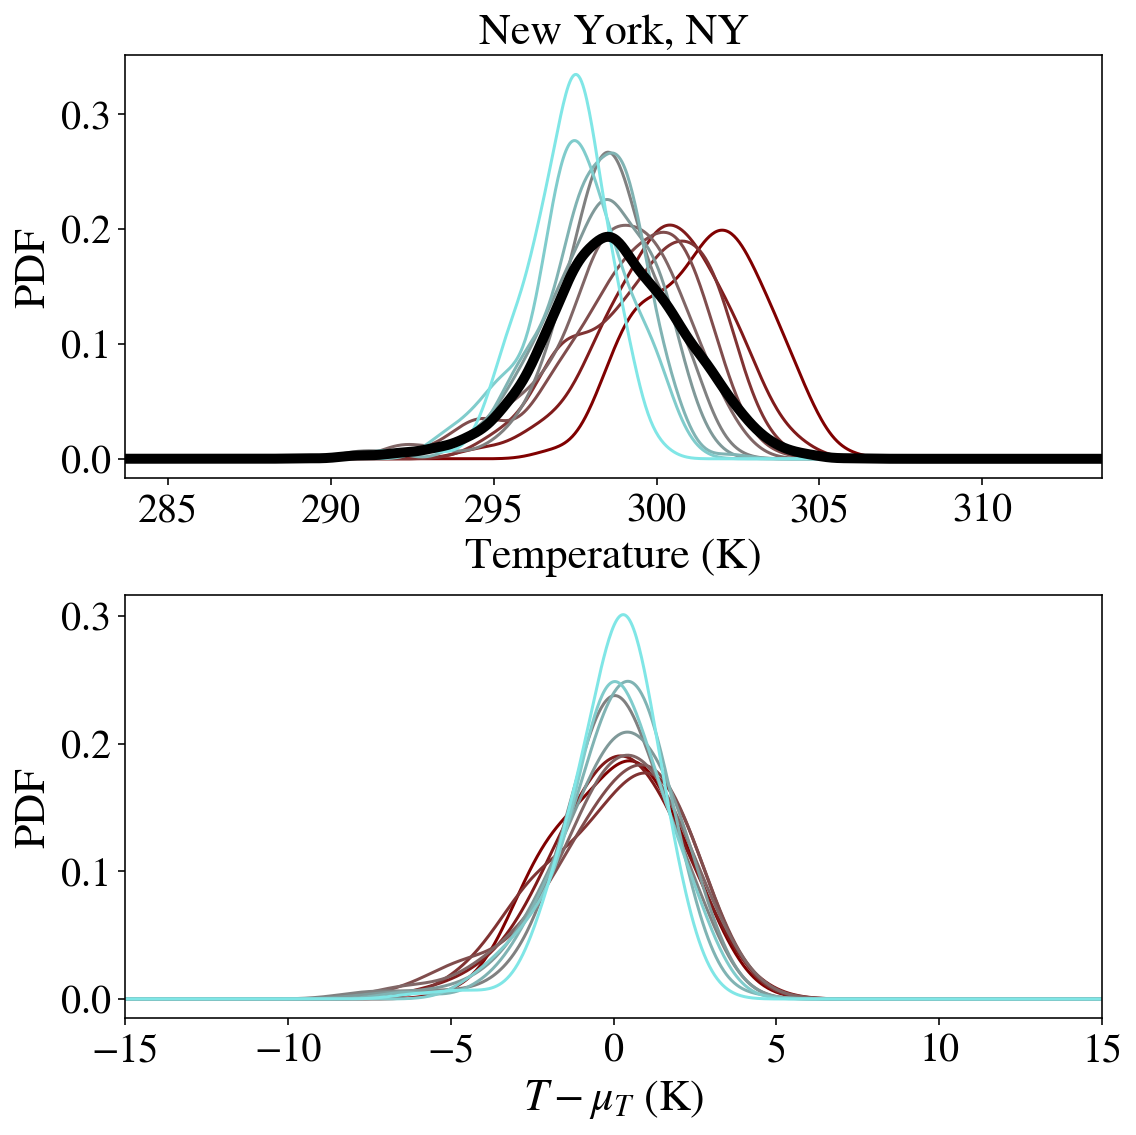

In [9]:
fig,ax = plt.subplots(2, 1, figsize=[8,8])


xx = np.linspace(280,320, 1000)
kde_all = stats.gaussian_kde(temp)

# select 10 soil-moisture quantiles. 
ql=np.percentile(soil,np.arange(0,100,10))
qu=np.percentile(soil,np.arange(5,105,10))

# estimate the pdf of temperature in each soil moisture quantile
for j in range(len(ql)):
    #select temperatures in soil-moisture quantile
    y=np.asarray(temp.where(soil>ql[j]).where(soil<qu[j]))
    y=y[~np.isnan(y)]
    # estimate pdf using gaussian kernel density estimation
    kde = stats.gaussian_kde(y)

    # plot 
    xx = np.linspace(280,320, 1000)
    shade=j/len(ql)    
    ax[0].plot(xx,kde(xx),color=[0.5,shade,shade])
    ax[0].set_ylabel('PDF', fontsize=22)
    ax[0].set_xlim(np.median(temp)-15,np.median(temp)+15)

ax[0].plot(xx,kde_all(xx),color='k',linewidth=5)
ax[0].set_xlabel("Temperature (K)", fontsize=22)
ax[0].set_title("New York, NY", fontsize = 22 )


# redo the calculation, but now remove the sample mean    
for j in range(len(ql)):
    y=np.asarray(temp.where(soil>ql[j]).where(soil<qu[j]))
    y=y[~np.isnan(y)]
    kde = stats.gaussian_kde((y-np.mean(y)),bw_method=0.5)
    xx = np.linspace(-20,20, 1000)
    
    g=j/len(ql)    
    ax[1].plot(xx,kde(xx),color=[0.5,g,g])
    ax[1].set_xlabel('$T - \mu_{T}$ (K)', fontsize=22)
    ax[1].set_ylabel('PDF', fontsize=22)
    ax[1].set_xlim(-15,+15)

for i in range(0, 2):
    ax[i].tick_params(axis='both', labelsize=20)
    
fig.tight_layout()

#fig.savefig("figures/2-2-2022-NY-PDFs.png", dpi=400)
#fig.savefig("../docs/figdump/2-2-2022-NY-PDFs.png", dpi=400)

In [14]:
# make nullcline 

# make sw dist and soil range
Theta = np.linspace(soil_min,soil_max,10**4)

"""
# fitted parameters for SGP DOE ARM site (calculated from model_fit.ipynb) 
alpha_s=4
alpha_r=8
nu   =0.03
mu   =40
V    =5
m0   =0.1
"""
"""
# fitted parameters for Witchita, KS (calculated from model_fit.ipynb)
alpha_s=4
alpha_r=7
nu   =0.02
mu   =40
V    =5
m0   =0.2
"""

"""
# fitted parameters for Dallas, TX (calculated from model_fit.ipynb)
alpha_s=4
alpha_r=7
nu   =0.018
mu   =38
V    =6
m0   =0.3
"""

"""
# fitted parameters for New York, NY (calculated from model_fit.ipynb)
alpha_s=2
alpha_r=7
nu   =0.013
mu   =38
V    =6
m0   =0.72
"""

"""
# fitted parameters for Seattle, WA (calculated from model_fit.ipynb)
alpha_s=6
alpha_r=7
nu   =0.011
mu   =35
V    =6
m0   =0.68
"""

# fitted parameters for Atlanta, GA (calculated from model_fit.ipynb)
alpha_s=6.5
alpha_r=7
nu   =0.03
mu   =35
V    =6
m0   =0.2

m = (Theta - np.min(Theta)) / (np.max(Theta) - np.min(Theta))

L    =2.5E6
N_samples = 10**5
F_dist = np.random.normal(solar_mean, solar_std, N_samples)
T_d_dist = np.random.normal(Td_mean, Td_std, N_samples)
Td_mean = np.mean(T_d_dist)
solar_mean = np.mean(F_dist)

P_surf = 101325 # Pa
R_w = 461.52 #J/kg
T_0 = 273.15 # K

prefactor_model = 0.622 * L * (P_surf * R_w * Td_mean**2)**(-1) * 611
exp_term_model = np.exp(L * R_w**(-1) * (T_0**(-1) - Td_mean**(-1) ))
gamma = prefactor_model * exp_term_model

prefactor_dist = 0.622 * L * (P_surf * R_w * T_d_dist**2)**(-1) * 611
exp_term_dist = np.exp(L * R_w**(-1) * (T_0**(-1) - T_d_dist**(-1) ))

gamma_dist = prefactor_dist * exp_term_dist

T_mean = Td_mean + solar_mean * (alpha_s + alpha_r + nu * m0 * L * gamma  + L * gamma * nu * m)**(-1)
T_dist = T_d_dist[:, None] + F_dist[:, None] * (alpha_s + alpha_r + nu * m0 * L * gamma_dist[:, None]  + L * gamma_dist[:, None] * nu * m)**(-1)
maxT = np.max(T_dist[:,0])
lowT = np.min(T_dist[:,0])
maxindex = np.where(T_dist[:,0] == maxT)[0]
lowindex = np.where(T_dist[:,0] == lowT)[0]
upperT = T_dist[maxindex,:]
lowerT = T_dist[lowindex,:]

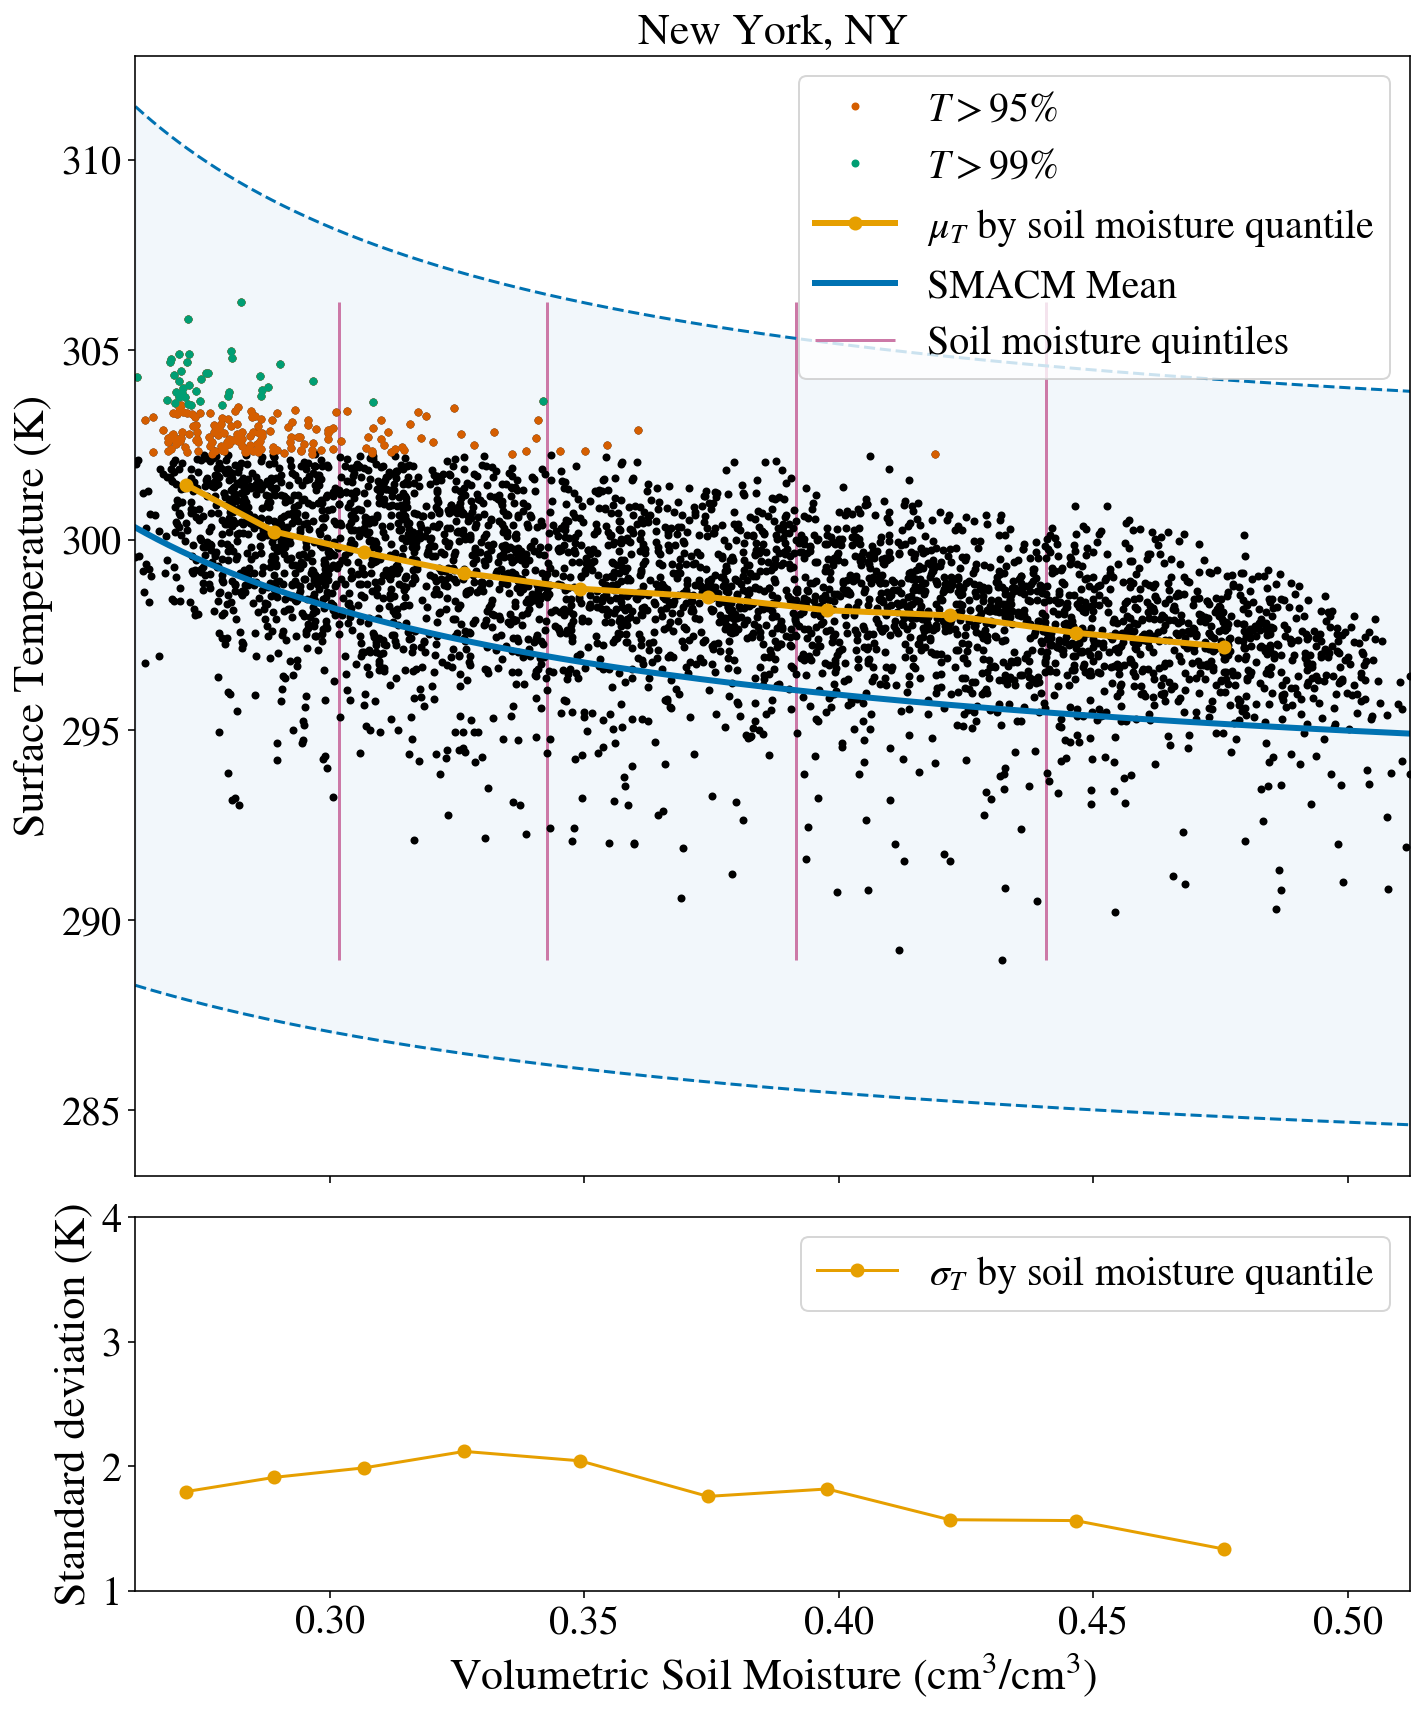

In [15]:
# Plot temperature-soil moisture relation

fig,ax = plt.subplots(2, 1, figsize=[10,12],gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# plot soil-moisture and temperature
ax[0].set_title("New York, NY", fontsize=22)
ax[0].fill_between(Theta, lowerT[0], upperT[0], alpha=0.05, color='#0072B2')
ax[0].plot(Theta, upperT[0], color='#0072B2', linestyle='dashed')
ax[0].plot(Theta, lowerT[0], color='#0072B2', linestyle='dashed')
ax[0].plot(soil          ,temp          ,'.', color='k')
ax[0].plot(soil[temp>t95],temp[temp>t95],'.', color='#D55E00',label='$T > 95$%')
ax[0].plot(soil[temp>t99],temp[temp>t99],'.', color='#009E73',label='$T > 99$%')
ax[0].plot(soil_mean,temp_mean,label='$\mu_T$ by soil moisture quantile', color='#E69F00', linewidth=3, marker='o', linestyle='solid')
ax[0].plot(Theta, T_mean, color='#0072B2', linewidth=3, label='SMACM Mean')
# plot soil moisture quintiles
soil_qs= np.percentile(soil,[20,40,60,80])
ax[0].vlines(soil_qs,np.min(temp),np.max(temp),label='Soil moisture quintiles',color='#CC79A7')

# decorate
#ax[0].set_xlabel('volumetric soil moisture')
ax[0].set_ylabel('Surface Temperature (K)', fontsize=22)
#ax[0].set_xlim(np.min(soil),np.max(soil))

# plot temperature standard deviation
ax[1].plot(soil_mean,temp_sd,color='#E69F00', marker='o', label= '$\sigma_T$ by soil moisture quantile')
ax[1].set_xlim(np.min(soil),np.max(soil))
ax[1].set_ylim(1,4)
ax[1].set_xlabel('Volumetric Soil Moisture (cm$^3$/cm$^3$)', fontsize=22)
ax[1].set_ylabel('Standard deviation (K)', fontsize=22)

for i in range(0,2):
    ax[i].legend(fontsize=20, loc='upper right')
    ax[i].tick_params(axis='both', labelsize=20)

fig.tight_layout()

#fig.savefig("figures/1-20-2022-NY-PS.png", dpi=400)
#fig.savefig("../docs/figdump/1-20-2022-NY-PS.png", dpi=400)

# Lag Regresssion

In [17]:
from scipy.signal import detrend
def lag_regress(x,y,N):
    z=np.zeros(2*N+1)
    for j in range(-N,N+1):
        x1=x.shift({'time':j})
        y1=y.sel(time=x.time[~x1.isnull()])
        x1=x1.sel(time=x1.time[~x1.isnull()])
        r = np.polyfit(detrend(x1), detrend(y1), 1)
        z[j]=r[0]
    lags=np.arange(-N,N+1)    
    z=np.concatenate([z[N+1:],z[0:N+1]])
    return z,lags

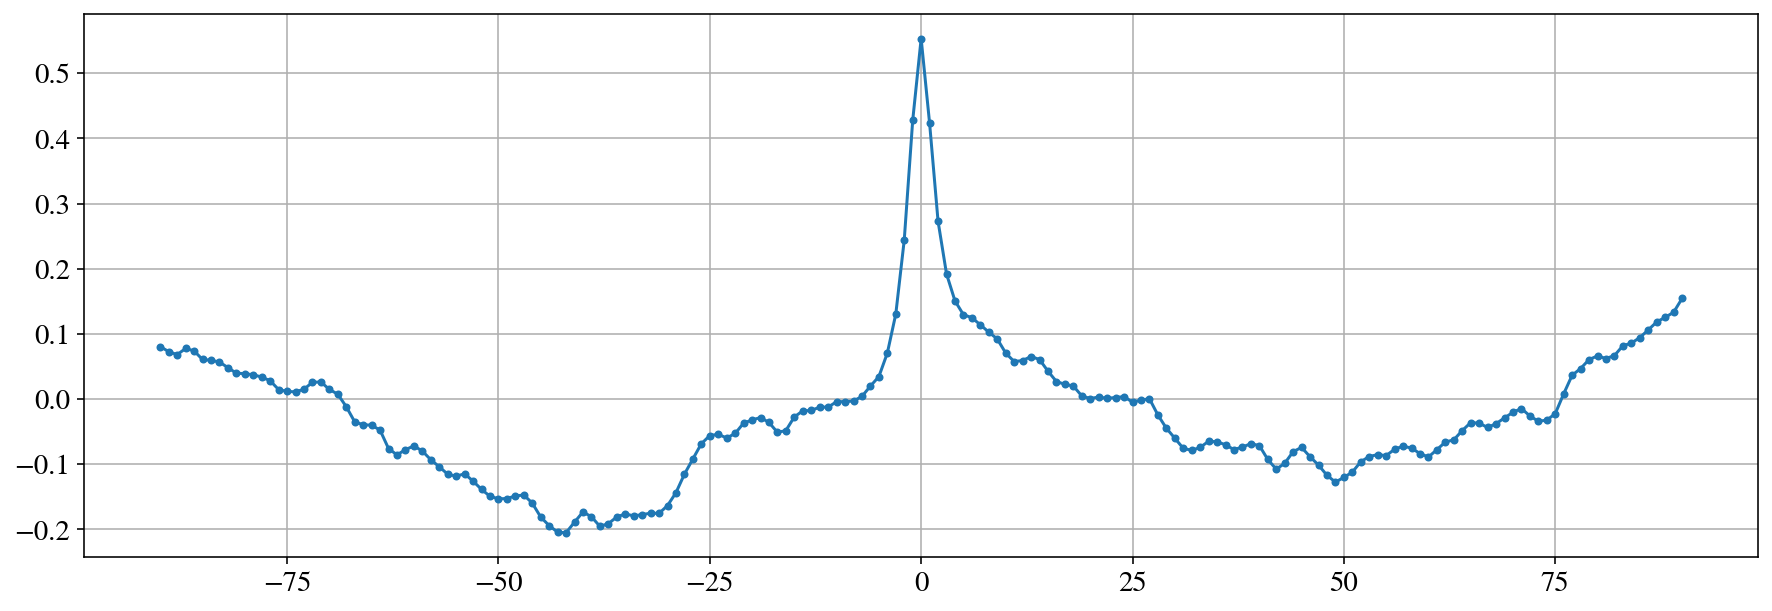

In [18]:
x=ds_loc.d2m
y=ds_loc.t2m
#y=-20*x+50*stats.norm.rvs(size=len(x))

reg,lag=lag_regress(x,y,90)

plt.plot(lag,reg,'.-')
plt.grid()

# Misc

<Figure size 864x864 with 0 Axes>

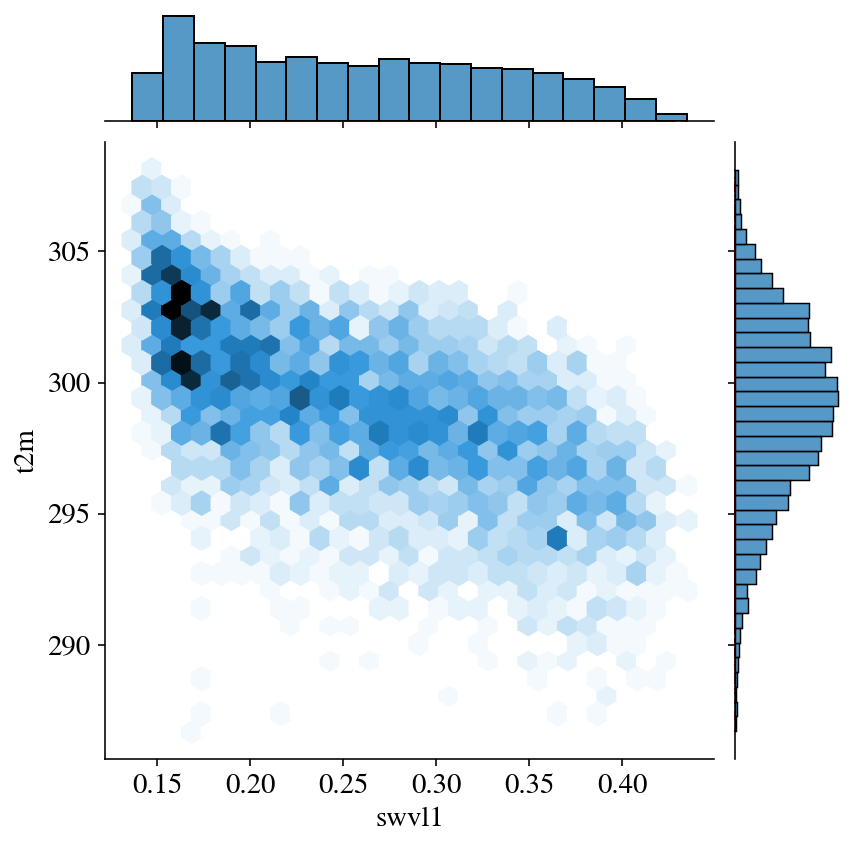

In [19]:
fig=plt.figure(figsize=[12,12])
g = sns.jointplot(data=ds_loc, x="swvl1", y="t2m",kind='hex')
g.plot_marginals(sns.rugplot, color="r", height=-.015, clip_on=False)
#g.plot_joint(sns.hexplot, color="r", zorder=2, levels=10,bw=0.3)